In [ ]:
import scipy.io as sio
import numpy as np
import scipy.io as io
import os
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# import all other relevant packages here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/EE 243/Assignments/Assignment 3/tiny-UCF101/tiny-UCF101'

In [ ]:
import os
p = os.listdir(path)
p.pop(0)
import glob
l = []
for dir in p:
  l=l+glob.glob(path+'/'+dir+'/*jpg')
len(l)

13175

In [ ]:
os.walk(path)

<generator object _walk at 0x7b6395e90970>

In [ ]:
import scipy.io as sio
p = sio.loadmat('/content/drive/My Drive/EE 243/Assignments/Assignment 3/video.mat')
print(p.keys())


dict_keys(['__header__', '__version__', '__globals__', 'I'])


# Logistic Regression Function

In [ ]:
def apply_gradients(features, labels, weights, learning_rate, reg_strength=0.01):
  # x is a matrix of size n_samples x n_feature
  # l is a vector of size n_samples x n_class
  # theta is a matrix of size n_feature x n_class
  # lr is the learning rate
  # returns  weights in the variable new_theta

  # FILL IN
  # Compute the logits (linear combination of features and weights)
  logits = np.dot(features, weights)

  # Apply softmax to obtain probabilities
  exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
  probabilities = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

  # Compute the gradient of the loss function with respect to weights
  gradient = np.dot(features.T, (probabilities - labels)) / features.shape[0]

  # Apply L2 regularization
  gradient += reg_strength * weights

  # Update the weights using the learning rate
  new_theta = weights - learning_rate * gradient

  return new_theta

# ROC

In [ ]:
def getROC(predictions, ground_truth):

  # gt is the ground truth vector of 1 or 0 of size n_samples x 1. 1 indicates a positive and 0 negative
  # pred is a vector of predictions of size n_samples x 1
  # TPR is the True Positive Rate
  # FPR is the False Positive Rate
  # returns TPR and FPR

  # FILL IN
  # Sort the predictions to determine thresholds
  thresholds = np.sort(predictions)

  # Initialize lists to store TPR and FPR values
  TPR = []  # True Positive Rate
  FPR = []  # False Positive Rate

  # Calculate TPR and FPR for each threshold
  for threshold in thresholds:
      # Determine predicted positive and negative labels based on the current threshold
      predicted_positive = predictions >= threshold
      predicted_negative = predictions < threshold

      # Calculate true positives, false positives, true negatives, false negatives
      true_positives = np.sum((ground_truth == 1) & predicted_positive)
      false_positives = np.sum((ground_truth == 0) & predicted_positive)
      true_negatives = np.sum((ground_truth == 0) & predicted_negative)
      false_negatives = np.sum((ground_truth == 1) & predicted_negative)

      # Calculate TPR and FPR for the current threshold
      tpr = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
      fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0

      # Append the TPR and FPR to the respective lists
      TPR.append(tpr)
      FPR.append(fpr)

  return TPR, FPR

In [ ]:
import scipy.io as io
subset = io.loadmat('/content/drive/My Drive/EE 243/Assignments/Assignment 3/subset.mat')['subset']
video = io.loadmat('/content/drive/My Drive/EE 243/Assignments/Assignment 3/video.mat')

In [ ]:
len(subset)

13320

Unique values in subset['subset']: ['testing ' 'training']
Shape of subset['subset']: (13320,)
Max index: 99, Features shape: (100, 20)
Test accuracy of 10 :  0.227273
Test accuracy of 20 :  0.227273
Test accuracy of 30 :  0.250000
Test accuracy of 40 :  0.295455
Test accuracy of 50 :  0.318182
Test accuracy of 60 :  0.295455
Test accuracy of 70 :  0.272727
Test accuracy of 80 :  0.272727
Test accuracy of 90 :  0.272727
Test accuracy of 100 :  0.295455
Test accuracy of 110 :  0.272727
Test accuracy of 120 :  0.272727
Test accuracy of 130 :  0.272727
Test accuracy of 140 :  0.272727
Test accuracy of 150 :  0.250000
Test accuracy of 160 :  0.250000
Test accuracy of 170 :  0.250000
Test accuracy of 180 :  0.250000
Test accuracy of 190 :  0.250000
Test accuracy of 200 :  0.250000
Final test accuracy: 31.82%


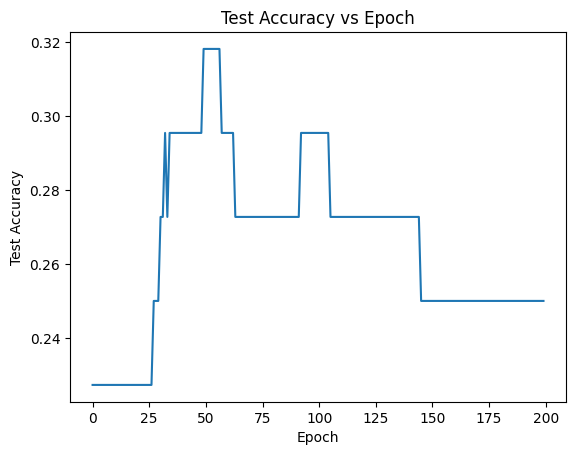

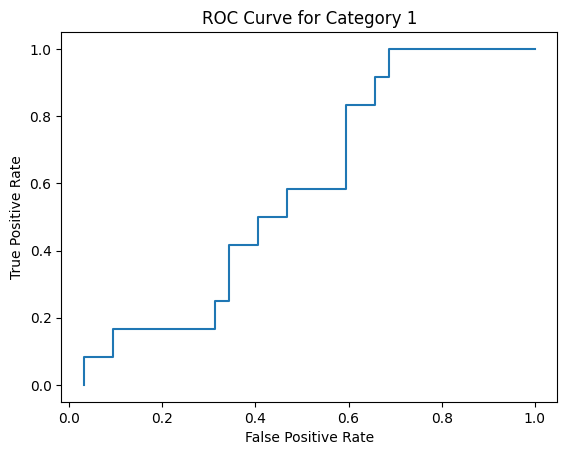

In [ ]:
from sklearn.preprocessing import StandardScaler


# Load subset.mat which contains indices for training and testing
subset = sio.loadmat('/content/drive/My Drive/EE 243/Assignments/Assignment 3/subset.mat')

# Print unique values and shape of subset['subset'] to understand its structure
print("Unique values in subset['subset']:", np.unique(subset['subset']))
print("Shape of subset['subset']:", subset['subset'].shape)

# Load the feature matrix from ucf101dataset_extraction.h5
with h5py.File('/content/drive/My Drive/EE 243/Assignments/Assignment 3/ucf101dataset_extraction.h5', 'r') as hdf_file:
    # Extract the feature matrix from the HDF5 file
    all_features = hdf_file['feature'][:]
    # Extract the corresponding labels from the HDF5 file
    all_labels = hdf_file['label'][:]

# Strip trailing spaces from subset values
subset_cleaned = np.char.strip(subset['subset'])

# Extract training and testing indices from cleaned subset
trlabelidx = np.where(subset_cleaned == 'training')[0]
telabelidx = np.where(subset_cleaned == 'testing')[0]

# Filter out indices that are out of bounds
trlabelidx = trlabelidx[trlabelidx < all_features.shape[0]]
telabelidx = telabelidx[telabelidx < all_features.shape[0]]

# Ensure the extracted indices are not empty
if trlabelidx.size == 0 or telabelidx.size == 0:
    raise ValueError("Training or testing indices are empty. Check the subset['subset'] values.")

# Check the maximum index to ensure it is within the valid range
print(f"Max index: {max(np.max(trlabelidx), np.max(telabelidx))}, Features shape: {all_features.shape}")

# Write code to get training and testing labels and features based on the above indices
trfeature = all_features[trlabelidx, :]
tefeature = all_features[telabelidx, :]
trlabel = all_labels[trlabelidx].flatten()
telabel = all_labels[telabelidx].flatten()

# Standardize the features
scaler = StandardScaler()
trfeature = scaler.fit_transform(trfeature)
tefeature = scaler.transform(tefeature)

# Hyperparameters
batchsize = 128  # Modify to see change in performance
lr = 0.001  # Modify to see change in performance
classlist = np.unique(trlabel)

# Write code to convert trlabel and telabel to one-hot vectors with dimensions no of samples x number of categories
num_classes = classlist.size
trlabel1hot = np.eye(num_classes)[trlabel]
telabel1hot = np.eye(num_classes)[telabel]

# Initialize theta (weights)
theta = np.random.randn(trfeature.shape[1], num_classes) * 0.01  # INITIALIZE FILL IN
diff = 1
epoch = 1
test_accuracy_history = []

while diff > 1e-10 and epoch <= 200:
    theta_old = theta.copy()

    # Train
    for i in range(0, len(trlabel), batchsize):
        endpos = min(len(trlabel), i + batchsize)
        theta = apply_gradients(trfeature[i:endpos, :], trlabel1hot[i:endpos, :], theta, lr)

    diff = np.linalg.norm(theta_old - theta)

    # Write code for prediction
    logits = tefeature.dot(theta)
    predictions = np.argmax(logits, axis=1)

    # FILL IN TO ASSIGN test accuracy to variable test_accuracy using the prediction made above
    test_accuracy = np.mean(predictions == telabel)
    test_accuracy_history.append(test_accuracy)

    # Print test accuracy at intervals of 10 epochs
    if epoch % 10 == 0:
        print(f'Test accuracy of {epoch} :  {test_accuracy:.6f}')

    epoch += 1

# Print final test accuracy
print(f"Final test accuracy: {np.max(test_accuracy_history) * 100:.2f}%")

# Write code to plot test accuracy vs epoch
plt.plot(test_accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Epoch')
plt.show()

# FILL IN THE FIRST ARGUMENT SHOULD BE A COLUMN VECTOR CONTAINING THE CORRECT CATEGORY PREDICTION
# Check the number of classes to use the correct index for ROC
num_classes = logits.shape[1]
category_index = 49 if num_classes > 49 else 0  # Adjust this to select the correct category for ROC calculation

# Calculate ROC values for the selected category
TPR, FPR = getROC(logits[:, category_index], telabel1hot[:, category_index])

# PLOT TPR VS FPR CURVE HERE
plt.plot(FPR, TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Category {category_index + 1}')
plt.show()